Loading data from: heart_disease_dataset.csv
Dataset shape: (400, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


Using target column: heart_disease
Numeric features: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
Categorical features (will be one-hot encoded if present): []
Train shape: (320, 13) Test shape: (80, 13)

--- Tuning LogisticRegression ---
Best params for LogisticRegression: {'clf__C': 0.01, 'clf__penalty': 'l2'}
Best CV ROC-AUC: 0.7564

--- Tuning DecisionTree ---
Best params for DecisionTree: {'clf__criterion': 'entropy', 'clf__max_depth': 7, 'clf__min_samples_split': 10}
Best CV ROC-AUC: 0.6162

--- Tuning RandomForest ---
Best params for RandomForest: {'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best CV ROC-AUC: 0.7201

--- Tuning SVM ---
Best params for SVM: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Best CV ROC-AUC: 0.7445

LogisticRegression Test Metric

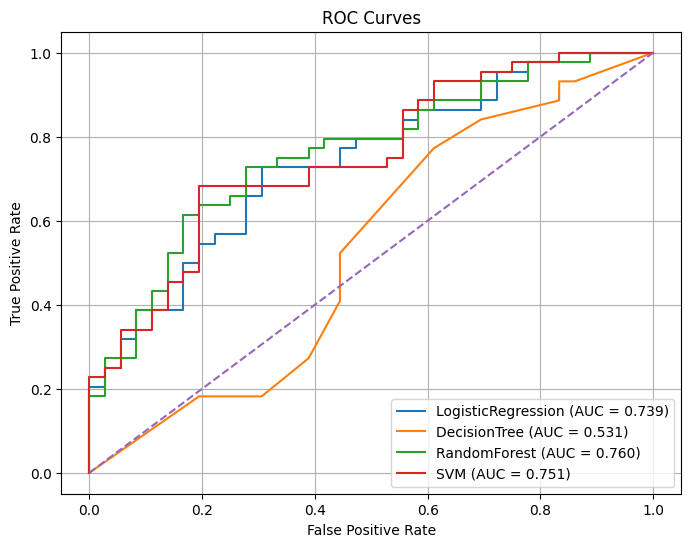


Derived feature count after preprocessing: 13

Random Forest feature importances (top 10):


,feature,importance
7,max_heart_rate,0.227125
0,age,0.161369
3,resting_blood_pressure,0.139011
4,cholesterol,0.107766
9,st_depression,0.083073
1,sex,0.073510
2,chest_pain_type,0.056999
11,num_major_vessels,0.043006
10,st_slope,0.022969
8,exercise_induced_angina,0.022116



Logistic Regression: top coefficients (absolute) -- top 15:


,feature,importance
7,max_heart_rate,0.236930
0,age,0.208032
1,sex,0.168005
3,resting_blood_pressure,0.128318
2,chest_pain_type,0.107281
11,num_major_vessels,0.106984
5,fasting_blood_sugar,0.102825
4,cholesterol,0.092838
8,exercise_induced_angina,0.092210
6,resting_ecg,0.076802



Using model for permutation importance: RandomForest

Permutation importances (top 15):


,feature,importance
0,age,0.089804
7,max_heart_rate,0.069539
3,resting_blood_pressure,0.025758
11,num_major_vessels,0.012721
4,cholesterol,0.011616
5,fasting_blood_sugar,0.008649
8,exercise_induced_angina,0.008586
10,st_slope,0.003914
6,resting_ecg,0.002399
12,thalassemia,-0.000568


Saved LogisticRegression to saved_models\LogisticRegression_best.pkl
Saved DecisionTree to saved_models\DecisionTree_best.pkl
Saved RandomForest to saved_models\RandomForest_best.pkl
Saved SVM to saved_models\SVM_best.pkl


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
2,RandomForest,0.6875,0.6863,0.7955,0.7368,0.7601
3,SVM,0.6625,0.6889,0.7045,0.6966,0.7506
0,LogisticRegression,0.6625,0.6809,0.7273,0.7033,0.7393
1,DecisionTree,0.6000,0.6071,0.7727,0.6800,0.5309



Done. Inspect 'summary' for quick comparison and 'saved_models/' for saved pipelines.

🏆 Best Classification Model
Best Model: RandomForest
ROC-AUC: 0.7601
F1-Score: 0.7368
Accuracy: 0.6875
Precision: 0.6863
Recall: 0.7955

📊 Final Model Comparison Summary:
             Model  Accuracy  Precision  Recall     F1  ROC_AUC
      RandomForest    0.6875     0.6863  0.7955 0.7368   0.7601
               SVM    0.6625     0.6889  0.7045 0.6966   0.7506
LogisticRegression    0.6625     0.6809  0.7273 0.7033   0.7393
      DecisionTree    0.6000     0.6071  0.7727 0.6800   0.5309


In [1]:
# Heart disease classification pipeline
# Requirements: pandas, numpy, scikit-learn, matplotlib, joblib
# pip install pandas numpy scikit-learn matplotlib joblib

import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, auc, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import joblib

# -------------------------
# 1. Load dataset (tries a few locations and target names)
# -------------------------
possible_paths = [
    'heart_disease_dataset.csv',

]

df = None
for p in possible_paths:
    if os.path.exists(p):
        print(f"Loading data from: {p}")
        df = pd.read_csv(p)
        break

if df is None:
    raise FileNotFoundError(
        "Could not find heart disease CSV. Tried: " + ", ".join(possible_paths) +
        ". Please upload the CSV or place it in the notebook folder."
    )

print("Dataset shape:", df.shape)
display(df.head())

# -------------------------
# 2. Identify target column
# -------------------------
possible_targets = ['target', 'Target', 'diagnosis', 'Diagnosis', 'output',
                    'HeartDisease', 'heart_disease', 'has_disease', 'CHD', 'disease']

target_col = None
for t in possible_targets:
    if t in df.columns:
        target_col = t
        break

if target_col is None:
    # fallback: assume last column is the target
    target_col = df.columns[-1]
    print(f"No common target column name found. Using last column as target: '{target_col}'")

print("Using target column:", target_col)
y = df[target_col]

# Convert common labels to binary 0/1 if needed
if y.dtype == object or y.nunique() > 2:
    # try to map known string labels
    y_unique = sorted(y.unique())
    print("Target unique values:", y_unique)
    # If appears like 'Yes'/'No' or 'presence' etc, map to 1/0
    mapping = {}
    for val in y_unique:
        if str(val).lower() in ['yes','y','positive','present','1','pos','disease','true','t']:
            mapping[val] = 1
        elif str(val).lower() in ['no','n','negative','absent','0','neg','healthy','false','f']:
            mapping[val] = 0
    if mapping:
        y = y.map(mapping)
        print("Mapped target values using:", mapping)
    else:
        # If still not binary, try converting numeric strings
        try:
            y = pd.to_numeric(y)
        except Exception:
            raise ValueError("Target column could not be interpreted as binary. Inspect the dataset.")

# Ensure binary labels 0/1
if set(y.unique()) - {0,1}:
    # Try to threshold if numeric (e.g., 0..4)
    if pd.api.types.is_numeric_dtype(y):
        # convert everything >0 to 1
        y = (y > 0).astype(int)
        print("Converted numeric target to binary by (y>0).")
    else:
        raise ValueError("Target column values are not binary after attempts. Unique values: " + str(sorted(y.unique())))

# Drop target from features
X = df.drop(columns=[target_col])

# -------------------------
# 3. Basic preprocessing
# -------------------------
# Separate numeric columns (most clinical features are numeric). If there are categorical features, the user can extend.
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numeric features:", num_cols)
print("Categorical features (will be one-hot encoded if present):", cat_cols)

# Preprocessing transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# -------------------------
# 4. Define models and GridSearch parameter grids
# -------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_and_parameters = {
    'LogisticRegression': {
        'pipeline': Pipeline([('pre', preprocessor),
                              ('clf', LogisticRegression(max_iter=10000, solver='liblinear'))]),
        'param_grid': {
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__penalty': ['l2']  # using l2 for stability; switch to 'l1' with solver='liblinear' if desired
        }
    },
    'DecisionTree': {
        'pipeline': Pipeline([('pre', preprocessor),
                              ('clf', DecisionTreeClassifier(random_state=42))]),
        'param_grid': {
            'clf__max_depth': [3, 5, 7, None],
            'clf__min_samples_split': [2, 5, 10],
            'clf__criterion': ['gini', 'entropy']
        }
    },
    'RandomForest': {
        'pipeline': Pipeline([('pre', preprocessor),
                              ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))]),
        'param_grid': {
            'clf__n_estimators': [50, 100, 200],
            'clf__max_depth': [5, 10, None],
            'clf__min_samples_split': [2, 5],
        }
    },
    'SVM': {
        'pipeline': Pipeline([('pre', preprocessor),
                              ('clf', SVC(probability=True))]),
        'param_grid': {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['rbf', 'linear'],
            'clf__gamma': ['scale', 'auto']
        }
    }
}

# -------------------------
# 5. Grid search + training
# -------------------------
best_estimators = {}
cv_results_summary = {}

for name, mp in models_and_parameters.items():
    print(f"\n--- Tuning {name} ---")
    gscv = GridSearchCV(
        estimator=mp['pipeline'],
        param_grid=mp['param_grid'],
        scoring='roc_auc',   # use ROC-AUC as primary metric for medical diagnosis
        cv=cv,
        n_jobs=-1,
        verbose=0
    )
    gscv.fit(X_train, y_train)
    print(f"Best params for {name}: {gscv.best_params_}")
    print(f"Best CV ROC-AUC: {gscv.best_score_:.4f}")
    best_estimators[name] = gscv.best_estimator_
    cv_results_summary[name] = {
        'best_params': gscv.best_params_,
        'best_cv_score': gscv.best_score_
    }

# -------------------------
# 6. Evaluate on test set and collect metrics
# -------------------------
def evaluate_model(name, estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)
    y_proba = None
    if hasattr(estimator, "predict_proba"):
        try:
            y_proba = estimator.predict_proba(X_test)[:,1]
        except Exception:
            y_proba = None
    if y_proba is None and hasattr(estimator, "decision_function"):
        try:
            y_proba = estimator.decision_function(X_test)
            # scale to 0-1 via logistic function if needed; roc_auc accepts scores
        except Exception:
            y_proba = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"\n{name} Test Metrics:")
    print("Accuracy: {:.4f}".format(acc))
    print("Precision: {:.4f}".format(prec))
    print("Recall: {:.4f}".format(rec))
    print("F1-score: {:.4f}".format(f1))
    print("ROC-AUC: {}".format(f"{roc_auc:.4f}" if roc_auc is not None else "N/A"))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    return {
        'name': name, 'estimator': estimator, 'y_pred': y_pred, 'y_proba': y_proba,
        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

results = []
for name, est in best_estimators.items():
    res = evaluate_model(name, est, X_test, y_test)
    results.append(res)

# -------------------------
# 7. Plot ROC curves for all models (if probabilities/scores available)
# -------------------------
plt.figure(figsize=(8,6))
for r in results:
    if r['y_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, r['y_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{r['name']} (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# -------------------------
# 8. Feature importance
#    - For tree-based: feature_importances_
#    - For logistic: coefficients (after inverse scaling to original units)
#    - Global: permutation importance on the best performing model by ROC-AUC
# -------------------------
# Prepare a preprocessed training dataset (numpy) and feature names post-preprocessing:
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
# Get feature names after OneHotEncoding if any
feature_names = []
if isinstance(preprocessor.named_transformers_['num'], Pipeline):
    feature_names += num_cols
# handle categorical feature names
if cat_cols:
    ohe = preprocessor.named_transformers_['cat'].named_steps['ohe']
    cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()
    feature_names += cat_feature_names

print("\nDerived feature count after preprocessing:", len(feature_names))

# Helper: print top-k importances
def print_topk_importances(names, importances, k=10):
    fi = pd.DataFrame({'feature': names, 'importance': importances})
    fi = fi.sort_values(by='importance', ascending=False).head(k)
    display(fi)

# Tree-based importances (RandomForest)
if 'RandomForest' in best_estimators:
    rf = best_estimators['RandomForest'].named_steps['clf']
    try:
        importances = rf.feature_importances_
        print("\nRandom Forest feature importances (top 10):")
        print_topk_importances(feature_names, importances, k=15)
    except Exception as e:
        print("Could not extract RF feature importances:", e)

# Logistic coefficients
if 'LogisticRegression' in best_estimators:
    lr = best_estimators['LogisticRegression'].named_steps['clf']
    try:
        # coefficients correspond to transformed features; to roughly compare, take absolute values
        coefs = np.abs(lr.coef_).ravel()
        print("\nLogistic Regression: top coefficients (absolute) -- top 15:")
        print_topk_importances(feature_names, coefs, k=15)
    except Exception as e:
        print("Could not extract logistic coefficients:", e)

# Permutation importance on best model by ROC-AUC (if any)
# Find best model by ROC-AUC on test set (some may have None)
best_by_auc = max([r for r in results if r['roc_auc'] is not None], key=lambda x: x['roc_auc'], default=None)
if best_by_auc is None:
    # fallback: pick top by f1
    best_by_auc = max(results, key=lambda x: x['f1'])

print("\nUsing model for permutation importance:", best_by_auc['name'])
# compute permutation importance on the *pipeline* using raw X_test
perm = permutation_importance(best_estimators[best_by_auc['name']], X_test, y_test,
                              n_repeats=20, random_state=42, n_jobs=-1, scoring='roc_auc')
perm_importances = perm.importances_mean
print("\nPermutation importances (top 15):")
print_topk_importances(feature_names, perm_importances, k=15)

# -------------------------
# 9. Save the best models to disk
# -------------------------
out_dir = "saved_models"
os.makedirs(out_dir, exist_ok=True)
for name, est in best_estimators.items():
    fname = os.path.join(out_dir, f"{name}_best.pkl")
    joblib.dump(est, fname)
    print(f"Saved {name} to {fname}")

# -------------------------
# 10. Summary table of test metrics
# -------------------------
summary = pd.DataFrame([{
    'Model': r['name'],
    'Accuracy': r['accuracy'],
    'Precision': r['precision'],
    'Recall': r['recall'],
    'F1': r['f1'],
    'ROC_AUC': (r['roc_auc'] if r['roc_auc'] is not None else np.nan)
} for r in results]).sort_values(by='ROC_AUC', ascending=False)

display(summary.round(4))
print("\nDone. Inspect 'summary' for quick comparison and 'saved_models/' for saved pipelines.")


# -------------------------
# 11. Identify best model overall
# -------------------------
# Choose based on ROC-AUC primarily, then F1-score as tie-breaker
best_model_row = summary.sort_values(by=['ROC_AUC', 'F1'], ascending=False).iloc[0]
best_model_name = best_model_row['Model']

print("\n============================")
print("🏆 Best Classification Model")
print("============================")
print(f"Best Model: {best_model_name}")
print(f"ROC-AUC: {best_model_row['ROC_AUC']:.4f}")
print(f"F1-Score: {best_model_row['F1']:.4f}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"Precision: {best_model_row['Precision']:.4f}")
print(f"Recall: {best_model_row['Recall']:.4f}")

print("\n📊 Final Model Comparison Summary:")
print(summary.round(4).to_string(index=False))